In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings


warnings.filterwarnings('ignore')

In [2]:
#Reading train and test dataset over here
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [4]:
train.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [5]:
test.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.281143  0.466591   
1   6    A    B    A    B    A    A    A    A    B  ...  0.836443  0.482425   
2   9    A    B    A    B    B    A    B    A    B  ...  0.718531  0.212308   
3  12    A    A    A    A    B    A    A    A    A  ...  0.397069  0.369930   
4  15    B    A    A    A    A    B    A    A    A  ...  0.302678  0.398862   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  
1  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  
2  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  
3  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  
4  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  

[5 rows x 131 columns]

In [6]:
print('Train dataset have {0} rows and {1} columns'.format(train.shape[0], train.shape[1]))
print('Test dataset have {0} rows and {1} columns'.format(test.shape[0], test.shape[1]))

Train dataset have 188318 rows and 132 columns
Test dataset have 125546 rows and 131 columns


In [7]:
#Checking if either train or test data have any null values
train.isnull().values.any() or test.isnull().values.any()

False

There is no null values, present in both the dataset

In [8]:
#Storing all the column names in two seperate lists for easier use
cat_name = ['cat'+str(x) for x in range(1,117)]
cont_name = ['cont'+str(x) for x in range(1,15)]

In [9]:
train['id'].values[0:20]

array([ 1,  2,  5, 10, 11, 13, 14, 20, 23, 24, 25, 33, 34, 41, 47, 48, 49,
       51, 52, 55], dtype=int64)

Looking at our ID column, we can say that some of the points are removed from the dataset for creating more anonymization  <br>
This random removal of the datapoints can be seen through out whole dataset

In [10]:
train['id'].values[-20:]

array([587578, 587579, 587580, 587584, 587592, 587595, 587601, 587602,
       587603, 587605, 587606, 587607, 587611, 587612, 587619, 587620,
       587624, 587630, 587632, 587633], dtype=int64)

In [11]:
#Working on the Categorical Data 
unique_count = dict()
for i in cat_name:
    unique_count[i] = len(train[i].unique())
print('There are total {0} categorical columns where each columns consist only 2 unique values'.format(len(unique_count)))

There are total 116 categorical columns where each columns consist only 2 unique values


Here we can see that most of the column have 2 unique number of values, but some columns also have 3, 4 or even have upto 326 unique values in a single column. By doing further analysis we might be able to decode some meaning from some of the column

<h3>Pie Chart on Each Column </h3>

In [12]:
##Credits - https://www.kaggle.com/jrmistry/plotly-how-to-change-plot-data-using-dropdowns

fig = go.Figure()
temp_cat_list = [x for x in cat_name if len(train[x].unique()) == 2]
for i in temp_cat_list:
    temp_dict = dict(train[i].value_counts())
    fig.add_trace(
        go.Pie(labels=list(temp_dict.keys()), values=list(temp_dict.values())))

button_list = []
for i in range(len(temp_cat_list)):
    if i == 0:
        temp = dict(label = '--',
                  method = 'update',
                  args = [{'visible': [False]*len(temp_cat_list)},
                          {'title': 'Select a column from dropdown',
                           'showlegend':False}])
        button_list.append(temp)
    visible_list = [False]*len(temp_cat_list)
    visible_list[i] = True
    temp = dict(label = temp_cat_list[i],
              method = 'update',
              args = [{'visible': visible_list},
                      {'title': temp_cat_list,
                       'showlegend':True}])
    button_list.append(temp)
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active = 0,
        buttons = button_list)])

fig.show()

##Here, I have plotted only those graph where the categorical column have 2 level of data
##please set it to -- option first, or it would display some wierd graph

After going through some pie chart, I have noticed that the class A in all these column have major dominance, to confirm this, I have wrote a simple code, which checks for the dominanting value in each columns

In [13]:
temp_result = []
for i in temp_cat_list:
    temp_df = dict(train[i].value_counts())
    max_key = max(temp_df, key=temp_df.get)
    if max_key == 'A':
        temp_result.append(i)
temp_cat_list == temp_result

True

Here we can see that our assumption that class A dominates all the 2-level categorical column is true

Before Analysis further more into the categorical values, we need to focus on target value i.e loss column over here.
Plotting PDF on our loss column

<AxesSubplot:xlabel='loss', ylabel='Density'>

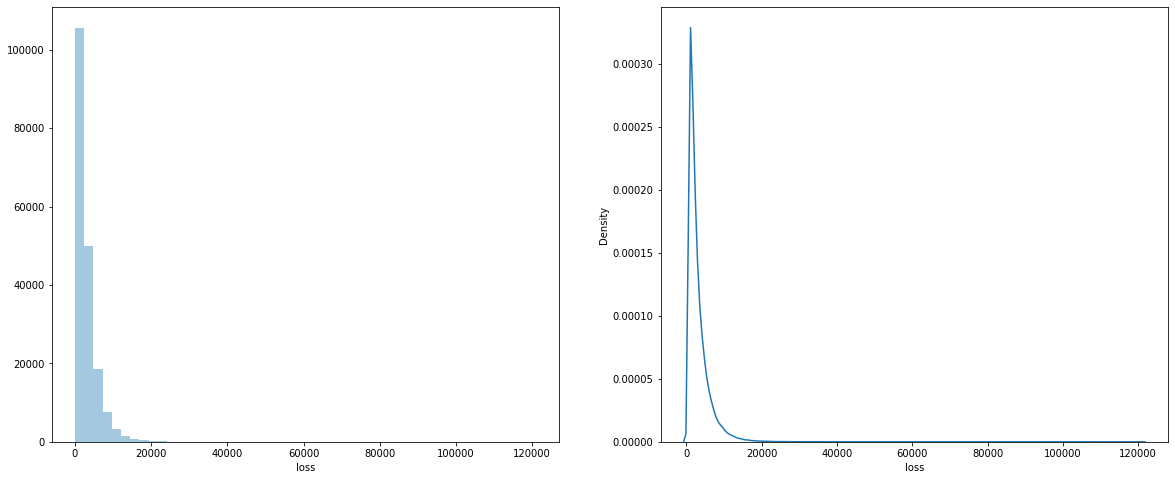

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train['loss'],kde=False, ax=ax[0])
sns.distplot(train['loss'],hist=False, ax=ax[1])

Over here we can see that our loss column is very skewed, to overcome this problem we will apply various transformation technique to our loss column.

<AxesSubplot:xlabel='loss', ylabel='Density'>

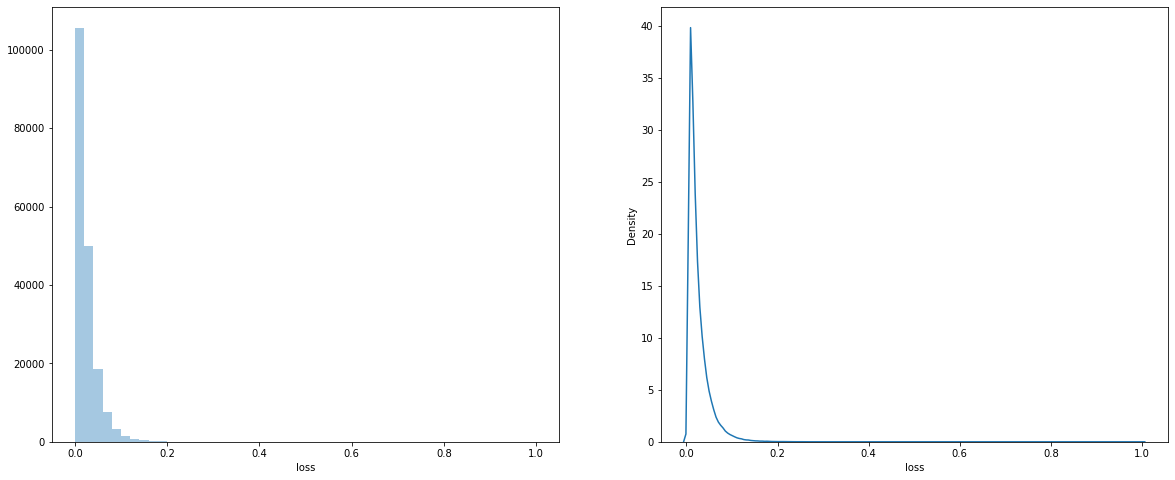

In [15]:
normalized_loss = (train.loss-train.loss.min())/(train.loss.max()-train.loss.min())
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(normalized_loss,kde=False, ax=ax[0])
sns.distplot(normalized_loss,hist=False, ax=ax[1])

Just by applying min-max transformation, we can see that it doesnt make much of a difference, but now our loss variable lies between 0 and 1, which might be usefully to us in future use
<br>
Now lets try applying log transformation and to avoid divide by zero error, we will be adding + 1 over here

<AxesSubplot:xlabel='loss', ylabel='Density'>

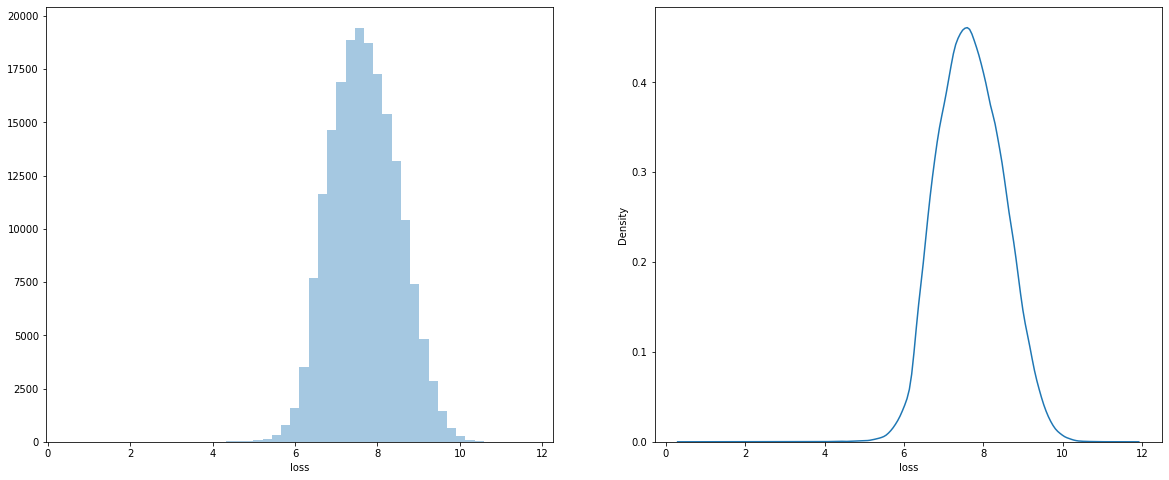

In [16]:
loss_log = np.log(train.loss + 1)
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(loss_log,kde=False, ax=ax[0])
sns.distplot(loss_log,hist=False, ax=ax[1])

Now our loss variable looks very close to a normal distribution, let try applying normalization on top of this

<AxesSubplot:xlabel='loss', ylabel='Density'>

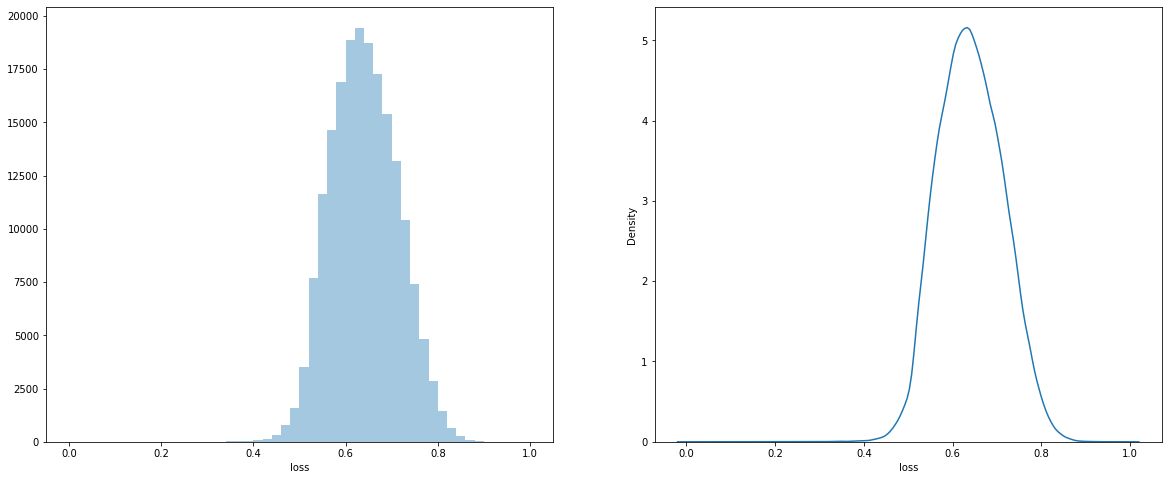

In [17]:
normalized_log = (loss_log-loss_log.min())/(loss_log.max()-loss_log.min())
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(normalized_log,kde=False, ax=ax[0])
sns.distplot(normalized_log,hist=False, ax=ax[1])

Applying Box Cox Transformation

Lambda value used for Transformation: -0.03961835256337142


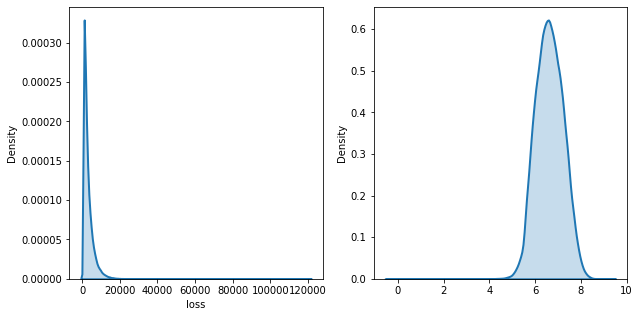

In [18]:
#https://www.geeksforgeeks.org/box-cox-transformation-using-python/

fig, ax = plt.subplots(1, 2)
fitted_data, fitted_lambda = stats.boxcox(train.loss)
sns.distplot(train.loss, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[1])

fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Our Box-Cox Transformation and Log + Normalized Transformation. both of these resulted us the similar sort of distribution
<br>
But we will be sticked to our Normalized + Log Transform loss columns, as it is already normalized 

In [19]:
#Storing the log normalised loss variable 
train['loss_ln'] = normalized_log

<h3>Loss variable percentile </h3>

In [20]:
for i in range(0,110,10):
    print('{0} percentile - {1}'.format(i,np.percentile(train.loss_ln.values, i)))

0 percentile - 0.0
10 percentile - 0.5487345983053316
20 percentile - 0.5763245026028123
30 percentile - 0.5989953104238187
40 percentile - 0.6191047741468068
50 percentile - 0.6384448180750446
60 percentile - 0.6584707400054535
70 percentile - 0.6801497993895131
80 percentile - 0.7051612270539311
90 percentile - 0.7373587923394795
100 percentile - 1.0


If we take a look over here we can see that 0-10th percentile took a huge jump from 0.0 to 0.54, but from over there we gradually keep on increasing but for 90-100th percentile we again see that it jumped alot between 90th and 100th percentile

In [21]:
#Zooming in the 90-100th percentile 
for i in range(90,101):
    print('{0} percentile - {1}'.format(i,np.percentile(train.loss_ln.values, i)))

90 percentile - 0.7373587923394795
91 percentile - 0.7414995960777733
92 percentile - 0.7459409784296457
93 percentile - 0.7507778033597101
94 percentile - 0.7564234976101883
95 percentile - 0.7627779024742124
96 percentile - 0.770004711840892
97 percentile - 0.7783437970174782
98 percentile - 0.7898148423985144
99 percentile - 0.8071533201770725
100 percentile - 1.0


Till 99th percentile it was increasing gradually, but after 99th percentile it moved a alot

In [22]:
#Zooming into the 99-100th percentile 
for i in np.linspace(99,100,11):
    print('{0} percentile - {1}'.format(i,np.percentile(train.loss_ln.values, i)))

99.0 percentile - 0.8071533201770725
99.1 percentile - 0.8094744861259661
99.2 percentile - 0.8120736820170281
99.3 percentile - 0.8151653526888559
99.4 percentile - 0.8188694517666971
99.5 percentile - 0.8225852825744427
99.6 percentile - 0.8273707126546515
99.7 percentile - 0.8339277110478137
99.8 percentile - 0.8421351385778739
99.9 percentile - 0.8556618283761274
100.0 percentile - 1.0


Over here also we see the same case as above

<b>NOTE</b> - We are working on the log normalized loss variable, not on the original loss variable <br>
By looking at the precentile we can say that, 90% of the claim values are under 0.73 <br>
Even till the 99th percentile our loss value is under 0.85 <br>
Between 99th - 100th percentile, our loss variable jumped alot

If we perform the same on analysis on  our original loss variable, our data look as follow

In [23]:
#Zooming into the 99-100th percentile - Original Loss variable
for i in np.linspace(99,100,11):
    print('{0} percentile - {1}'.format(i,np.percentile(train.loss.values, i)))

99.0 percentile - 13981.202999999998
99.1 percentile - 14349.159899999995
99.2 percentile - 14772.695200000004
99.3 percentile - 15292.787219999838
99.4 percentile - 15940.066500000252
99.5 percentile - 16616.923050000045
99.6 percentile - 17531.122119999956
99.7 percentile - 18865.974439999995
99.8 percentile - 20680.941940000015
99.9 percentile - 24061.050020000323
100.0 percentile - 121012.25


In [24]:
#Removing ID column from the train dataset
del train['id']

In [25]:
#Checking dominanting variable covered percecntage in categorical column 
skewed_col = []
for i in cat_name:
    temp = dict(train[i].value_counts())
    max_key = max(temp, key=temp.get)
    area_covered = (len(train[train[i] == max_key])/len(train))*100
    if area_covered >= 99:
        skewed_col.append(i)
        print('In {0} column, value {1} has covered {2}% of area'.format(i,max_key,round(area_covered,4)))

In cat15 column, value A has covered 99.9819% of area
In cat17 column, value A has covered 99.3049% of area
In cat18 column, value A has covered 99.4759% of area
In cat19 column, value A has covered 99.0399% of area
In cat20 column, value A has covered 99.8917% of area
In cat21 column, value A has covered 99.7807% of area
In cat22 column, value A has covered 99.9772% of area
In cat32 column, value A has covered 99.3569% of area
In cat33 column, value A has covered 99.4918% of area
In cat34 column, value A has covered 99.6899% of area
In cat35 column, value A has covered 99.8869% of area
In cat42 column, value A has covered 99.0999% of area
In cat46 column, value A has covered 99.5316% of area
In cat47 column, value A has covered 99.6278% of area
In cat48 column, value A has covered 99.8572% of area
In cat51 column, value A has covered 99.3378% of area
In cat55 column, value A has covered 99.923% of area
In cat56 column, value A has covered 99.9034% of area
In cat58 column, value A has 

Over here we could see that, there are total 31 columns where the same value is repeated atleast 99% of time<br>
These columns might not provide value while training<br>
So while training the model, we could drop these columns to speed up the training process

In [26]:
#here i am working on categorical variables which have only 2 unique values
#i am also considering only those column where columns are not highly skewed
extracted_column = []
for i in temp_cat_list:
    if i not in skewed_col:
        temp_val = []
        for j in sorted(train[i].unique()):
            temp_df = train[train[i] == j]
            mean_value = temp_df['loss'].mean()
            mean_loss = temp_df['loss_ln'].mean()
            temp_val.append(mean_loss)
        if abs(temp_val[1] - temp_val[0]) >= 0.10:
            extracted_column.append(i)
            print('#'*25)
            print('In {0} column - {1}, its mean value is {2}'.format(i,'A',temp_val[0]))
            print('In {0} column - {1}, its mean value is {2}'.format(i,'B',temp_val[1]))
            print('#'*25)
            

#########################
In cat57 column - A, its mean value is 0.6389277650810136
In cat57 column - B, its mean value is 0.766728360555299
#########################


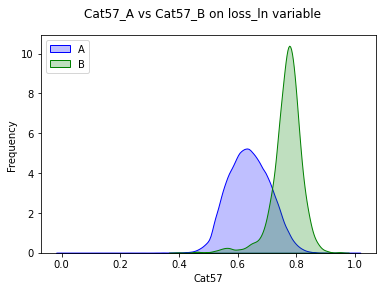

In [27]:
#Checking if our above assumptions is true or not
fig, ax = plt.subplots()

sns.kdeplot(train[train['cat57'] == 'A']['loss_ln'], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(train[train['cat57'] == 'B']['loss_ln'], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Cat57")
ax.set_ylabel("Frequency")
plt.legend(loc='upper left', labels=['A', 'B'])

fig.suptitle("Cat57_A vs Cat57_B on loss_ln variable");

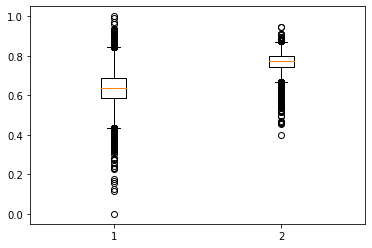

In [28]:
#using the same above data and plotted the box plot
plt.boxplot((train[train['cat57'] == 'A']['loss_ln'], train[train['cat57'] == 'B']['loss_ln']))
plt.show()

Over here we see a bit different pdf from datapoints with A value and B value <br>
This might help us in preprocessing and model building stage i.e We could train two different model based on this data

Here we can see that there is a significant difference between A and B in all cat57 column, So this concept can help us while model building <br>
While training the ML model, we could train a seperate model based on these columns

Working with Categorical column with more unique value

In [29]:
#Checking dominanting variable covered percentage in categorical column 
skewed_col = []
more_columns = [x for x in cat_name if len(train[x].unique()) > 2] 
for i in more_columns:
    temp = dict(train[i].value_counts())
    max_key = max(temp, key=temp.get)
    area_covered = (len(train[train[i] == max_key])/len(train))*100
    if area_covered >= 99:
        skewed_col.append(i)
        print('In {0} column, value {1} has covered {2}% of area'.format(i,max_key,round(area_covered,4)))

In cat77 column, value D has covered 99.5672% of area
In cat78 column, value B has covered 99.0484% of area


We can drop these column in data preprocessing stage as the data in the above two column is very skewed

<h2>Continuous Variable</h2>

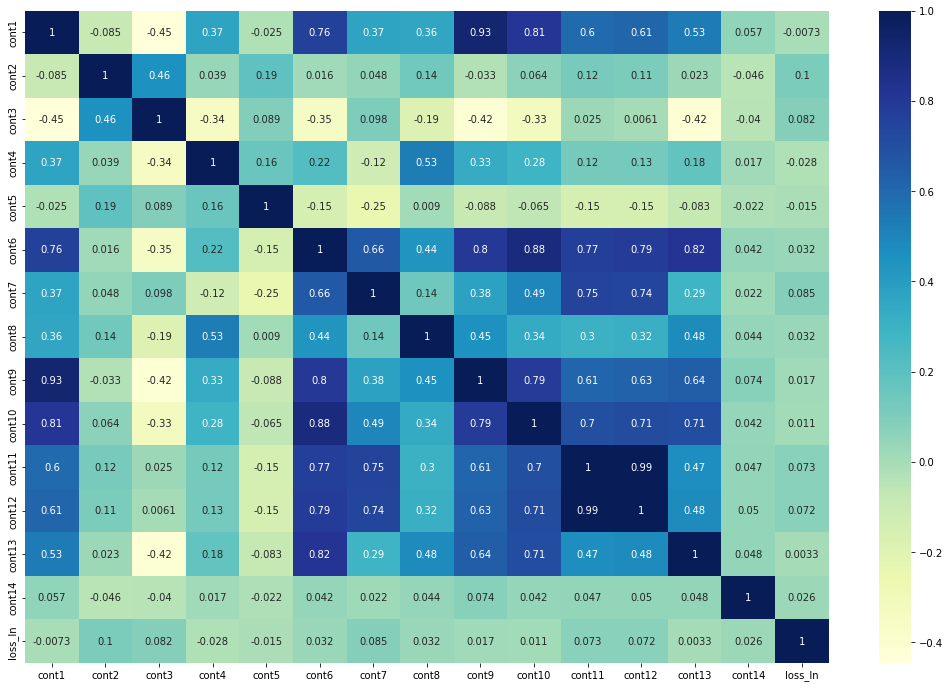

In [30]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(12)
temp_cont = cont_name.copy()
temp_cont.append('loss_ln')
dataframe = train[temp_cont]
dataplot = sns.heatmap(dataframe.corr(), cmap="YlGnBu", annot=True)
plt.show()

Over here we can see that cont1 and cont9 are highly correlated, same with the cont11 and cont12.<br>
There are also many other highly correlated pairs which I have not mentioned over here, while goingg through the preprocessing we need to handle all these pairs also

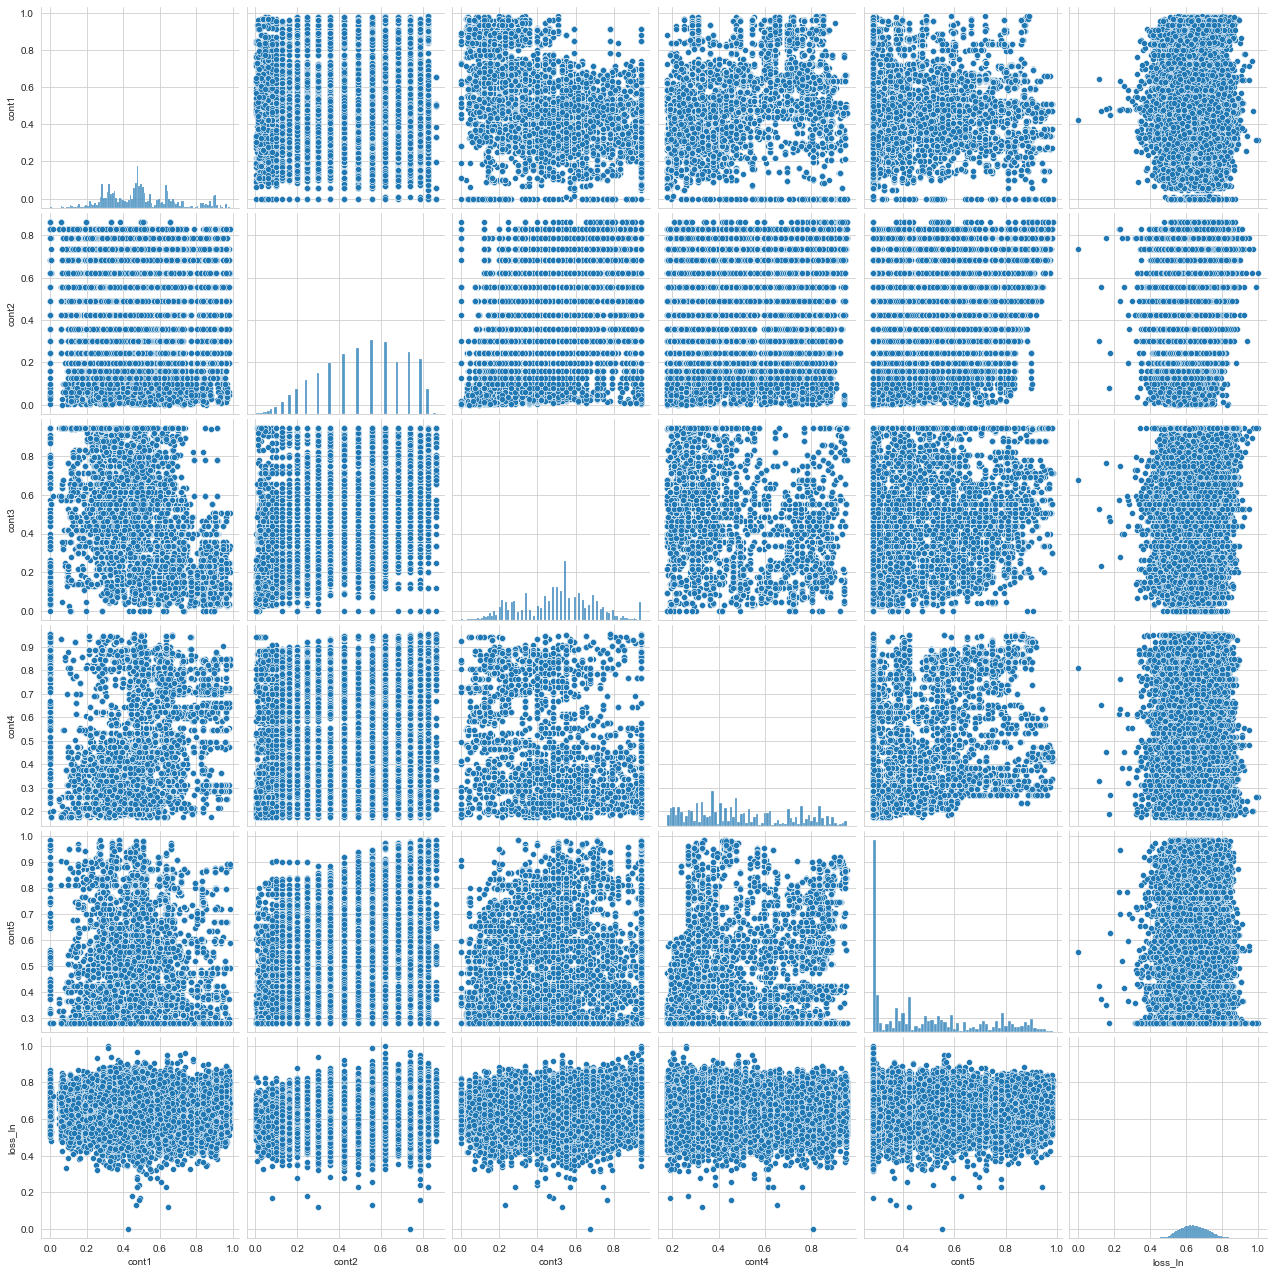

In [31]:
temp_cont_name = ['cont1','cont2','cont3','cont4','cont5','loss_ln']
plt.close()
sns.set_style('whitegrid');
sns.pairplot(train, height=3, vars=temp_cont_name)
plt.show()

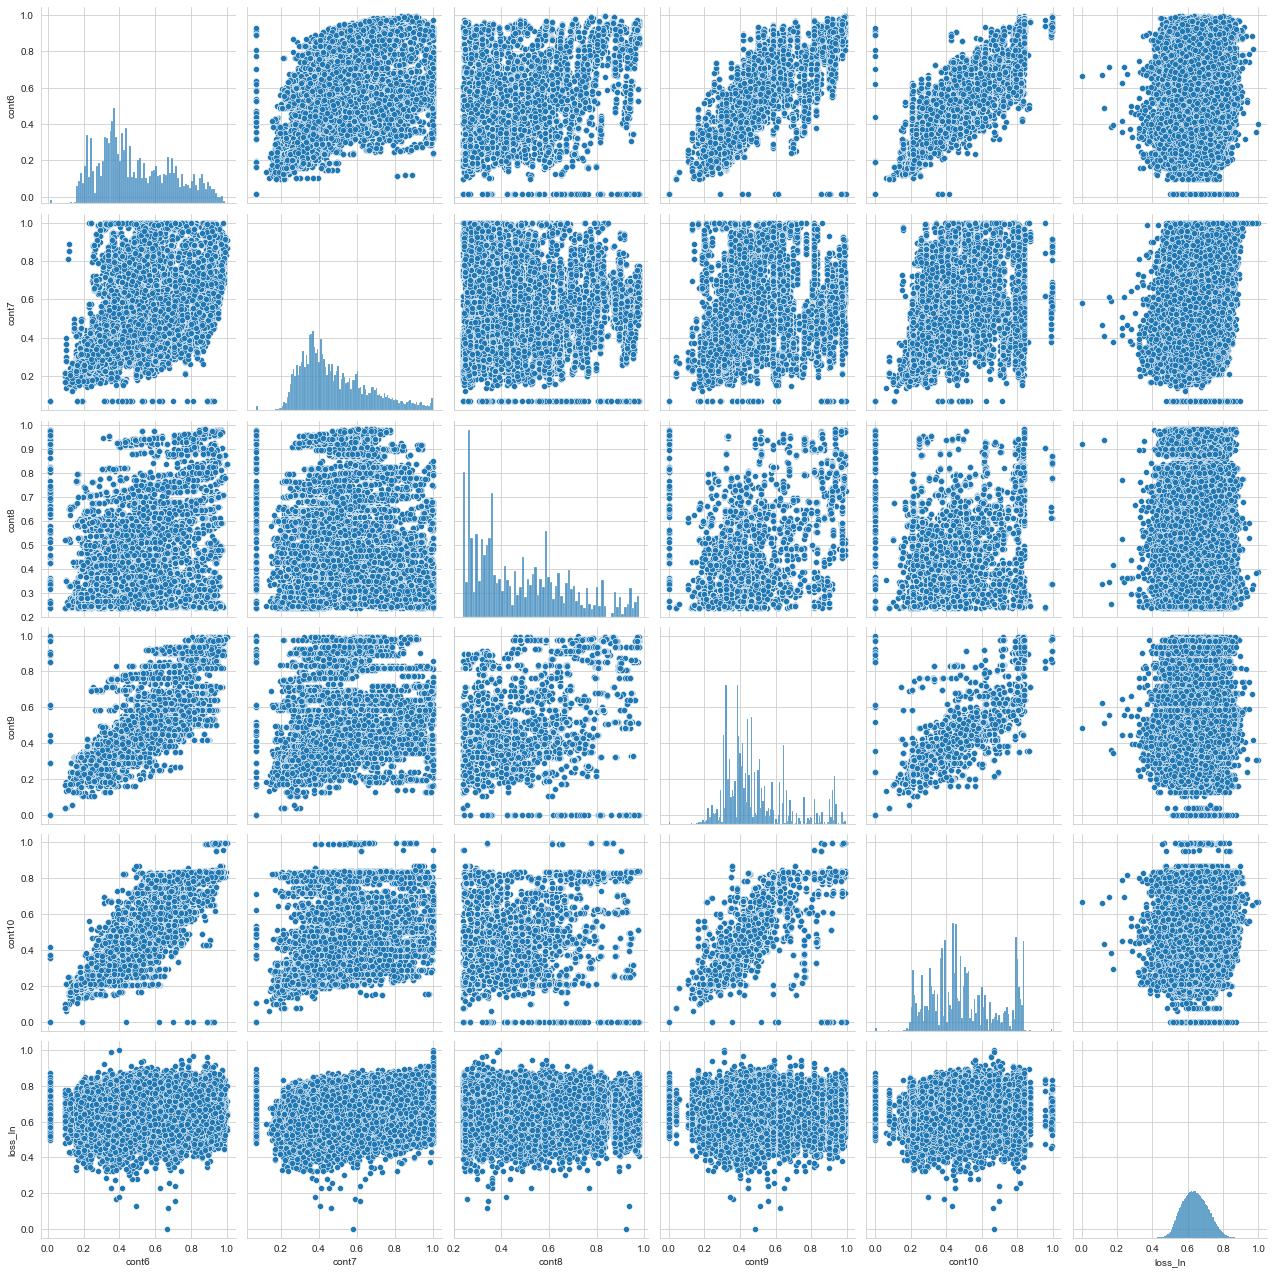

In [32]:
temp_cont_name = ['cont6','cont7','cont8','cont9','cont10','loss_ln']
plt.close();
sns.set_style('whitegrid');
sns.pairplot(train, height=3, vars=temp_cont_name)
plt.show()

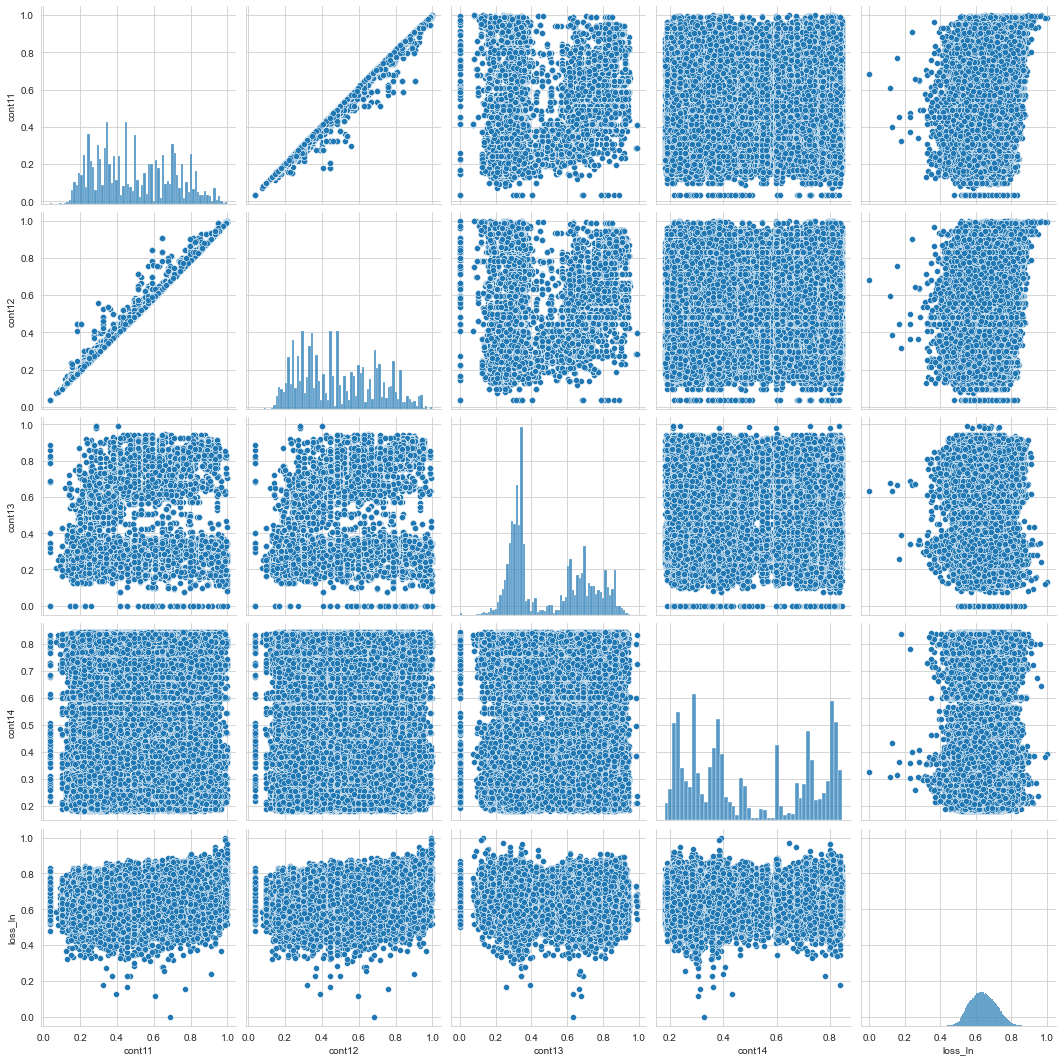

In [33]:
temp_cont_name = ['cont11','cont12','cont13','cont14','loss_ln']
plt.close();
sns.set_style('whitegrid');
sns.pairplot(train, height=3, vars=temp_cont_name)
plt.show()

Plotting pair-wise plot on plot on numerical column to see, if we can make any sense, But unfortunately nothing useful can be derived out of it

In [34]:
#Checking Skewness of Categorical column 
for i in cont_name:
    temp = train[i].skew()
    if abs(temp) >= 1:
        print('We noticed highed skewness for {0} i.e {1}'.format(i,temp))

We noticed highed skewness for cont9 i.e 1.072428719811583


<AxesSubplot:xlabel='cont9', ylabel='Density'>

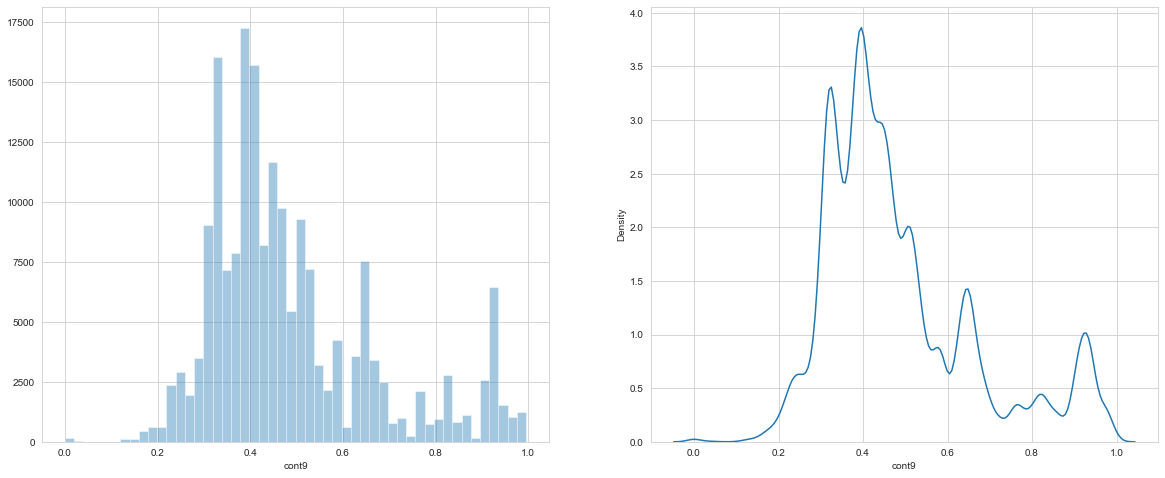

In [35]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train['cont9'],kde=False, ax=ax[0])
sns.distplot(train['cont9'],hist=False, ax=ax[1])

So at data preprocessing step we can drop the cont9 from our dataset or we can try to apply various feature transformation on this column.